In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv('/Users/burakfindikli/Documents/repos/ML_Analiz/data/2018-2019_tsl.csv',index_col = False)
df2=pd.read_csv('/Users/burakfindikli/Documents/repos/ML_Analiz/data/2018-2019_tsl.csv',index_col = False)

In [25]:
#  2017-2018 ile 2018-2019 sezonunun Maçlarını birleştirdim
df3=pd.concat([df, df2], ignore_index=True)


In [26]:
#Maçı ev sahibi kazandıysa 1 beraberlik olduysa 0 deplasman takımı kazandıysa 2 diye kodladım.
df3["kazanan_dep"]=df3.ev_sonuc < df3.dep_sonuc
df3.kazanan_dep = df3.kazanan_dep.astype(int)*2

df3["kazanan_ev"] = df3.ev_sonuc > df3.dep_sonuc
df3.kazanan_ev = df3.kazanan_ev.astype(int)

df3["kazanan_berabere"] = df3.ev_sonuc == df3.dep_sonuc
df3.kazanan_berabere = df3.kazanan_berabere.astype(int)*0

df3["sonuc"]=df3.kazanan_dep+df3.kazanan_ev+df3.kazanan_berabere
df3=df3.drop(['kazanan_dep', 'kazanan_ev','kazanan_berabere','ev_gol','dep_gol'], axis=1)
del(df,df2)

In [27]:
#bu değişkenlerde % ve , var temizleme yapmam lazım
col=['ev_topla_oynama','ev_ikili_mucadele_kazanma','ev_hava_topu','dep_topla_oynama','dep_ikili_mucadele_kazanma','dep_hava_topu','ev_pas_isabet','ev_rakip_yari_sahada_pas_isabeti','ev_orta_istabeti','dep_pas_isabet','dep_rakip_yari_sahada_pas_isabeti','dep_orta_istabeti','ev_sut_isabeti','dep_sut_isabeti','ev_top_kapma_basarisi','dep_top_kapma_basarisi']

In [28]:
# col değişkenindeki % , gibi karakterleri replace ettim
k=0
while k < df3[col].shape[1]:
    df3[col[k]] = df3[col[k]].str.replace(",",".")
    df3[col[k]] = df3[col[k]].str.replace("%","")
    k+=1

In [29]:
#object olan veri tiplerini floata çevirdim
df3[col]=df3[col].astype(float)

In [30]:
drop_value = ['ev_takim', 'dep_takim', 'ev_sonuc', 'dep_sonuc', ]
df3=df3.drop(drop_value,axis=1)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
#bağımlı bağımsız değişkenlerimi ayırdım 
#bağımlı değişken sonuc(1=Evsahibi kazanır 0=Beraberlik 2=Deplasman kazanır)
x = df3.iloc[:,:-1]
y = df3.sonuc
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
x_scaled = stdsc.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=101)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import time

In [34]:
start = time.process_time()
model = RandomForestClassifier(n_estimators=700).fit(X_train,y_train)
print(time.process_time()-start)

4.272423000000002


In [35]:
preds = model.predict(X_test)

In [36]:
print(confusion_matrix(y_test,preds))

[[109  10   2]
 [  4 208   6]
 [  0  14 123]]


In [37]:
model.score(X_test,y_test)

0.9243697478991597

In [38]:
model.feature_importances_

array([0.01975021, 0.02026033, 0.02078236, 0.01707598, 0.01099403,
       0.01339611, 0.02021555, 0.02117927, 0.02082136, 0.01763776,
       0.0108444 , 0.01282994, 0.02207824, 0.0177241 , 0.0240756 ,
       0.02655487, 0.03228777, 0.02067591, 0.02290822, 0.02505732,
       0.02496517, 0.02377226, 0.0225391 , 0.02088301, 0.01664045,
       0.03608926, 0.01238578, 0.01562157, 0.02498177, 0.05357127,
       0.01726478, 0.03589715, 0.00950048, 0.01470338, 0.02387367,
       0.04145481, 0.0168917 , 0.01892177, 0.03103788, 0.01755058,
       0.02074296, 0.04256954, 0.01590284, 0.0110376 , 0.00418792,
       0.01545672, 0.00974743, 0.00465983])

In [39]:
feature_imp = pd.Series(model.feature_importances_, index = x.columns)

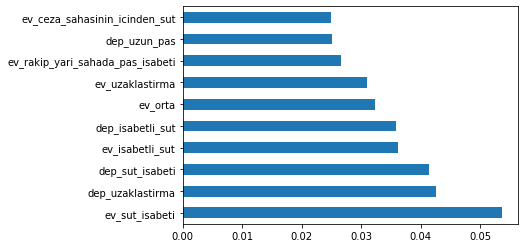

In [40]:
feature_imp.nlargest(10).plot(kind='barh')

In [41]:
best_feature = feature_imp.nlargest(6).index.to_list()

In [42]:
x_reduced = x[best_feature]

In [43]:
xr_scaled = StandardScaler().fit_transform(x_reduced)

In [44]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(xr_scaled,y,test_size=0.2)

In [45]:
start = time.process_time()
rmodel = RandomForestClassifier(n_estimators=700).fit(Xr_train,yr_train)
print(time.process_time()-start)

2.4847820000000027


In [46]:
rpred = rmodel.predict(Xr_test)
print(confusion_matrix(yr_test,rpred))
print(classification_report(yr_test,rpred))

[[ 94  22   6]
 [  2 211   9]
 [  6   8 118]]
              precision    recall  f1-score   support

           0       0.92      0.77      0.84       122
           1       0.88      0.95      0.91       222
           2       0.89      0.89      0.89       132

    accuracy                           0.89       476
   macro avg       0.89      0.87      0.88       476
weighted avg       0.89      0.89      0.89       476

